In [13]:
#coding=utf-8  
from keras.models import Model  
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate  
from keras.layers.convolutional import Conv2D,DepthwiseConv2D,MaxPooling2D,AveragePooling2D  
import numpy as np  
seed = 7  
np.random.seed(seed)  
  
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):  
    if name is not None:  
        bn_name = name + '_bn'  
        conv_name = name + '_conv'  
    else:  
        bn_name = None  
        conv_name = None  
  
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)  
    x = BatchNormalization(axis=3,name=bn_name)(x)  
    return x  
  
def Inception(x,nb_filter):  
    branch1x1 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)  
  
    branch3x3 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)  
    branch3x3 = Conv2d_BN(branch3x3,nb_filter,(3,3), padding='same',strides=(1,1),name=None)  
  
    branch5x5 = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)  
    branch5x5 = Conv2d_BN(branch5x5,nb_filter,(1,1), padding='same',strides=(1,1),name=None)  
  
    branchpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)  
    branchpool = Conv2d_BN(branchpool,nb_filter,(1,1),padding='same',strides=(1,1),name=None)  
  
    x = concatenate([branch1x1,branch3x3,branch5x5,branchpool],axis=3)  
  
    return x  
  
inpt = Input(shape=(256,256,3))  
#padding = 'same'，填充为(步长-1）/2,还可以用ZeroPadding2D((3,3))  
x = Conv2d_BN(inpt,64,(7,7),strides=(2,2),padding='same')  
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)  
x = Conv2d_BN(x,192,(3,3),strides=(1,1),padding='same')  
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

x = Inception(x,64)#256  
x = Inception(x,120)#480  
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)  
x = Inception(x,128)#512  
x = Inception(x,128)  
x = Inception(x,128)  
x = Inception(x,132)#528  
x = Inception(x,208)#832  
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)  
x = Inception(x,208)  
x = Inception(x,256)#1024  
x = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x)
x = Flatten()(x)
x = Dropout(0.4)(x)  
x = Dense(1000,activation='relu')(x)  
x = Dense(6,activation='softmax')(x)  
model = Model(inpt,x,name='inception')  

model.summary()  









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 64)   0           batch_normalization_

conv2d_46 (Conv2D)              (None, 8, 8, 208)    173264      max_pooling2d_11[0][0]           
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 8, 8, 208)    173264      max_pooling2d_11[0][0]           
__________________________________________________________________________________________________
batch_normalization_46 (BatchNo (None, 8, 8, 208)    832         conv2d_46[0][0]                  
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 8, 8, 208)    832         conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 8, 8, 832)    0           max_pooling2d_11[0][0]           
__________________________________________________________________________________________________
conv2d_45 

In [14]:
import tensorflow as tf
import time
from keras import optimizers
opt = optimizers.SGD(lr=1e-2, momentum=0.9,decay=0.0008)
#opt = Adam(lr=INIT_LR,decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  #CrossEntropyLoss  'categorical_crossentropy'
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
   3/1123 [..............................] - ETA: 2:57:18 - loss: 2.1157 - acc: 0.1250

D:\anaconda\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197616). Check your callbacks.
  % delta_t_median)


1123/1123 [==============================] - 219s 195ms/step - loss: 3.4249 - acc: 0.2870 - val_loss: 1.9543 - val_acc: 0.3430
Epoch 2/60
1123/1123 [==============================] - 158s 140ms/step - loss: 1.4308 - acc: 0.4343 - val_loss: 1.4399 - val_acc: 0.5569
Epoch 3/60
1123/1123 [==============================] - 156s 139ms/step - loss: 1.2200 - acc: 0.5331 - val_loss: 1.1225 - val_acc: 0.6410
Epoch 4/60
1123/1123 [==============================] - 154s 137ms/step - loss: 1.1125 - acc: 0.5731 - val_loss: 1.0015 - val_acc: 0.6677
Epoch 5/60
1123/1123 [==============================] - 152s 135ms/step - loss: 1.0315 - acc: 0.6133 - val_loss: 0.9625 - val_acc: 0.6890
Epoch 6/60
1123/1123 [==============================] - 150s 134ms/step - loss: 0.9633 - acc: 0.6398 - val_loss: 0.8604 - val_acc: 0.7361
Epoch 7/60
1123/1123 [==============================] - 151s 135ms/step - loss: 0.9355 - acc: 0.6513 - val_loss: 0.8231 - val_acc: 0.7437
Epoch 8/60
1123/1123 [=======================

1123/1123 [==============================] - 146s 130ms/step - loss: 0.2677 - acc: 0.9047 - val_loss: 0.7267 - val_acc: 0.9142


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

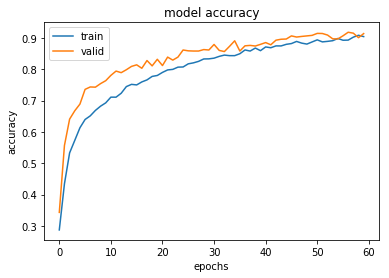

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

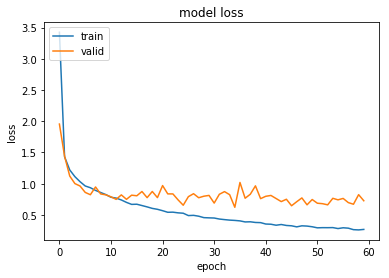

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[465  23   9   1  10   1]
 [  9 677  13   1   3   0]
 [  3 113 492   0   2   0]
 [  2  18   0 363   2   2]
 [  4  21   1  10 257   1]
 [  0   1   0   6   1 486]]

============TEST METRICS=============
Accuracy: 91.42475809142476%
Precision: 92.02218776384224%
Recall: 91.42475809142476%
F1-score: 91.72250010627683

TRAIN METRIC ----------------------
Train acc: 90.47


In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       0.96      0.91      0.94       509
                   Bipolaris maydis       0.79      0.96      0.87       703
Curvularia lunata(wakker) boed spot       0.96      0.81      0.87       610
               Northern leaf blight       0.95      0.94      0.95       387
                           Own spot       0.93      0.87      0.90       294
                      Sheath blight       0.99      0.98      0.99       494

                        avg / total       0.92      0.91      0.91      2997



In [21]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 13s 4ms/step
Test Accuracy: 91.42475809540238


In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 13s 4ms/step
0.7266820515638039
0.9142475809540238


In [23]:
print(history.history['val_acc'])

[0.3430096763827859, 0.5568902235767783, 0.6409743076608624, 0.6676676676875558, 0.6890223557089105, 0.7360694027559576, 0.7437437437636318, 0.7430764097629645, 0.7544210877743092, 0.7637637637836519, 0.7807807808006689, 0.7944611278143492, 0.7894561228093442, 0.7987987988186869, 0.8094761428293642, 0.8144811478343692, 0.8034701368233582, 0.8281614948480496, 0.8111444778310326, 0.8321654988520536, 0.8121454788519217, 0.8391725058391725, 0.8294961628294961, 0.8391725058590606, 0.8618618618618619, 0.8591925258790807, 0.8585251918784133, 0.8585251918585252, 0.8631965298830846, 0.86186186188175, 0.8795462128795463, 0.8605271938605272, 0.8568568568568569, 0.8735402068735402, 0.8912245578912246, 0.8585251918784133, 0.8752085418950967, 0.8765432098765432, 0.8745412078745413, 0.879879879899768, 0.8855522188855522, 0.8785452118984333, 0.8932265599131146, 0.8962295628962296, 0.8968968968968969, 0.9069069069069069, 0.9032365699032365, 0.9052385719052386, 0.906906906926795, 0.9085752419284634, 0.9

In [24]:
print(history.history['val_loss'])

[1.9543392674144124, 1.4399019694940862, 1.1224503254230156, 1.0015468535162346, 0.9624909295572771, 0.8604149161516367, 0.8231000509268449, 0.9471959583473715, 0.835511732377885, 0.8211700897993228, 0.7896757772615602, 0.7486711289431598, 0.8206277062067955, 0.7495120256433179, 0.8160045995642076, 0.8062728123492625, 0.8746041524477868, 0.7765425004768578, 0.8749835464704383, 0.776809456582005, 0.9697557673042203, 0.8365333552522325, 0.8360518815892714, 0.7407182502819174, 0.65493841841444, 0.7923378564496915, 0.8395369214005457, 0.7748995890687377, 0.7993960529516091, 0.8121752307380801, 0.6893760029799567, 0.8301435842274785, 0.8730624269608322, 0.8236162523177512, 0.6218928613743168, 1.0195259877968756, 0.7669916378050138, 0.8307400726473029, 0.9651595645350791, 0.7604403177672151, 0.7980618316637931, 0.8116209748846503, 0.7624608385720013, 0.7131479380463993, 0.7507061101191683, 0.6466224769526246, 0.7112169639289151, 0.7719045236040483, 0.6616119441343549, 0.746391342295297, 0.68

In [25]:
print(history.history['acc'])

[0.2869545859305432, 0.4343130705889337, 0.5330661322778011, 0.573034958819774, 0.6133377866977521, 0.6398352260075707, 0.6514139389957253, 0.6687820084746392, 0.6823647294589178, 0.6929414384456924, 0.7112001781406819, 0.7110888443421054, 0.723669561344912, 0.7449343130573136, 0.7520596748920942, 0.7502783344333991, 0.7598530393988856, 0.7663103985616556, 0.7774437764550445, 0.7804497884525485, 0.790247160975372, 0.7981518592608318, 0.799933199732799, 0.8070585615808517, 0.8076152304609219, 0.8176352705410822, 0.8207526163305267, 0.825539968839814, 0.8332219995546649, 0.8335560008773982, 0.8357826764507672, 0.841460699162858, 0.8455800489868626, 0.8437987085281674, 0.8437987085148955, 0.8499220663416601, 0.8619461144643965, 0.8584947673124026, 0.8680694722911612, 0.8597194388910275, 0.8716321531820074, 0.8690714762726331, 0.8749721665553329, 0.8748608327766645, 0.8799821866086851, 0.8824315297393909, 0.8892228902248942, 0.8837675350701403, 0.8807615230328202, 0.8875528835315954, 0.894

In [26]:
print(history.history['loss'])

[3.424927583838401, 1.430709058552005, 1.2200462467233526, 1.112588435245553, 1.0315341396815951, 0.963248365070315, 0.9354102776778406, 0.892499882151358, 0.85848462890209, 0.8253242463450792, 0.782515199365979, 0.7690179348124664, 0.7394377968141959, 0.7003867101281769, 0.6684724727947869, 0.6711198382197391, 0.649944988384833, 0.6283242296493019, 0.6043931091898164, 0.5896979561197919, 0.5673993313678838, 0.5420411392993291, 0.5438611128234141, 0.5329581020543847, 0.5269160215894063, 0.4891762512015808, 0.4929652646411251, 0.4793090330774018, 0.45623259337926275, 0.4528662966138349, 0.45012262640253414, 0.4338174004035547, 0.42469586981027035, 0.41655820310679875, 0.4117614270986931, 0.404303033316296, 0.3874884462081505, 0.3897128148135889, 0.3790146276616912, 0.3763224008658818, 0.3538814603903297, 0.35071611584005974, 0.33486033092285883, 0.3463076538806754, 0.3310102983756334, 0.3255725660251648, 0.3085571460687561, 0.32526336796830596, 0.32104421905182806, 0.31015152946749935, 

In [27]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 13s 4ms/step


array([0, 5, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[465  23   9   1  10   1]
 [  9 677  13   1   3   0]
 [  3 113 492   0   2   0]
 [  2  18   0 363   2   2]
 [  4  21   1  10 257   1]
 [  0   1   0   6   1 486]]


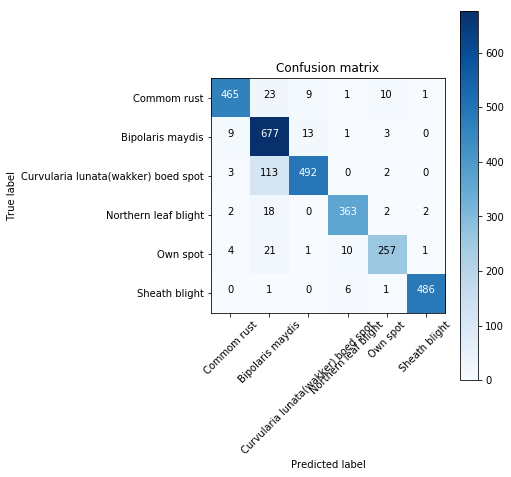

In [29]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')